# Forward model using the Waveform Simulator

*Bart Pelssers, 27-03-2018, last update 20-04-2018*

Provides forward model for the ABC project using the Pax Waveform Simulator (Fax).


In [1]:
import numpy as np

In [2]:
from abc_reconstruction.model import Model

You don't have ROOT or root_pandas, root truth file output is disabled


In [3]:
# Initialize the forward model
model = Model('XENON1T_ABC.ini')  # or use 'XENON1T_ABC.ini' to have some top PMTs off

In [4]:
# OPTIONALLY: Set different defaults for z,t,recoil_type,s1_photons_s2_electrons
model.change_defaults(s2_electrons = 200)

In [5]:
# View the current defaults
model.input_plugin.default_instruction

{'g4_id': -1,
 'recoil_type': 'NR',
 's1_photons': '50',
 's2_electrons': '200',
 't': '10000',
 'x': 0.0,
 'y': 0.0,
 'z': '0.0'}

In [6]:
# Call the forward model with a certain x,y (and the other default settings)
model(0, 45)

array([1.43269201e+02, 0.00000000e+00, 0.00000000e+00, 1.22244063e+02,
       3.77633660e+01, 1.60769418e+01, 6.15482421e+00, 4.85237974e+00,
       6.93909336e-01, 1.58048780e+00, 7.63372332e+00, 3.89060165e+00,
       0.00000000e+00, 9.02173347e-01, 1.53583902e+00, 3.03228547e+00,
       2.29068030e+00, 0.00000000e+00, 3.52212186e+00, 2.13160840e+00,
       0.00000000e+00, 6.28646759e+00, 5.34838724e+00, 4.45703674e-01,
       1.46015136e+00, 6.24445375e-01, 0.00000000e+00, 0.00000000e+00,
       3.45486624e+00, 3.25197644e+00, 2.18845629e+00, 6.85486839e-01,
       7.21008364e+00, 4.16480642e+00, 0.00000000e+00, 2.23046279e+01,
       1.54404996e+02, 5.91858428e+02, 3.57657514e+02, 6.35066857e+01,
       1.60937246e+01, 8.30229466e+00, 1.35519101e+01, 4.87594918e+00,
       5.02882764e+00, 3.89703650e+00, 7.03719672e+00, 1.98411106e+00,
       1.48354214e+00, 3.19892643e+00, 2.52196789e+00, 1.62443344e+00,
       4.58800977e+00, 1.05796082e+01, 4.52655366e+00, 3.33388646e+00,
      

In [7]:
# Get the position which pax reconstructed for this specific pattern
pos_dict = model.get_latest_pax_position()
pos_dict

{'PosRecNeuralNet': {'x': -0.15504134387119684, 'y': 44.6864079035758},
 'PosRecTopPatternFit': {'x': 0.1246867167919774, 'y': 46.00939849624059}}

# Tests

In [8]:
# Plot the pattern

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

In [18]:
plt.rc('font', size=16)

In [9]:
from pax.configuration import load_configuration

config = load_configuration('XENON1T')
pmt_config = config['DEFAULT']['pmts']
tpc_r = config['DEFAULT']['tpc_radius']
        
# PMT positions
xs_top = [pmt['position']['x'] for pmt in pmt_config][:127]
ys_top = [pmt['position']['y'] for pmt in pmt_config][:127]

def plot_hp(pat):
    plt.figure(figsize=(10,8))
    plt.scatter(xs_top, ys_top, c=pat, s=800, norm = LogNorm())
    plt.colorbar(label="Energy per PMT [pe]")
    plt.gca().set_aspect(1)
    plt.xlim(-tpc_r-5, tpc_r+5)
    plt.ylim(-tpc_r-5, tpc_r+5)
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')

In [10]:
tpc_r

47.9

In [11]:
# These PMTs are normally off in the top array (and when using XENON1T_ABC.ini, but not when using XENON1T_ABC_all_pmts_on.ini)
np.nonzero(np.array(config['DEFAULT']['gains'][:127]) == 0)

(array([  1,   2,  12,  26,  27,  34,  62,  65,  73,  79,  86,  88,  91,
        102, 118]),)

In [14]:
# Testing with high number of s2_electrons to see if all PMTs are on
model.change_defaults(s1_photons = 500,
                      s2_electrons=700,
                      z = 0,
                      t = 10000)

In [12]:
model.input_plugin.default_instruction

{'g4_id': -1,
 'recoil_type': 'NR',
 's1_photons': '50',
 's2_electrons': '200',
 't': '10000',
 'x': 0.0,
 'y': 0.0,
 'z': '0.0'}

In [14]:
pat = [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.35827953,  0.        ,  0.        ,  0.70641363,  1.03282348,
        0.        ,  1.8967314 ,  0.        ,  0.        ,  1.19674011,
        1.07759522,  0.        ,  0.6736656 ,  0.62827121,  1.07370607,
        0.        ,  4.15063076,  0.78889873,  1.98629485,  3.13860657,
        0.        ,  0.        ,  0.        ,  0.        ,  0.91714086,
        1.24111616,  0.        ,  0.        ,  1.30629189,  0.        ,
        0.        ,  0.65723126,  0.46617906,  0.        ,  0.        ,
        0.        ,  0.        ,  0.66723178,  0.        ,  0.79488426,
        0.        ,  2.26097591,  0.        ,  0.        ,  0.        ,
        1.59714914,  6.28826837,  2.78330074,  0.7895535 ,  4.77417541,
        5.78441495,  2.18779347,  0.        ,  0.        ,  0.        ,
        1.82683403,  3.12788569,  0.        ,  0.        ,  0.        ,
        0.        ,  0.62102705,  0.65023757,  1.55826854,  0.        ,
        0.        ,  0.        ,  1.55360097,  0.        ,  1.5254329 ,
        2.73995367,  7.6889639 ,  3.51035942, 10.35077029,  0.        ,
        1.56122178,  7.96290214,  0.7523693 ,  4.63972184,  0.        ,
        1.8955343 ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.69174572,  0.        ,  0.        ,  0.        ,  1.52389426,
        0.        ,  4.03246089,  4.13353391, 19.97783233, 57.68233516,
       31.79377215, 11.32122508,  0.        ,  2.65064402,  0.        ,
        0.        ,  0.        ,  1.66404317,  2.14783993,  0.51856324,
        0.67917455,  0.        ,  2.55828685, 14.60078752, 93.79749999,
       51.98447144,  5.72343116,  1.76911693,  0.        ,  0.        ,
        0.        ,  1.23233682,  4.89485424, 23.00643656,  6.43867974,
        1.98811113,  5.86909431]

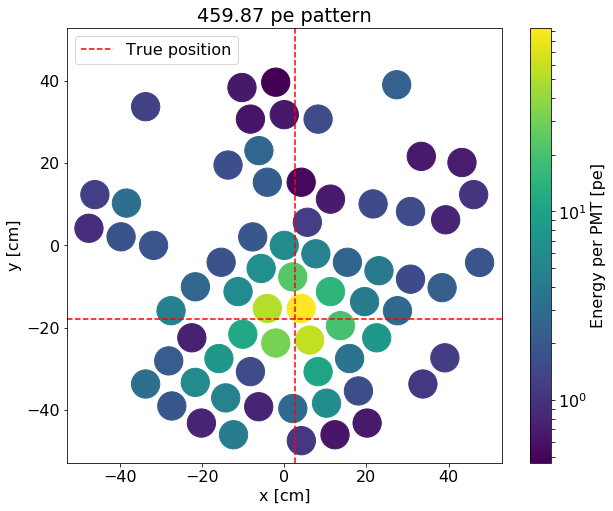

In [20]:
#x, y = 0, 40
#pat = model(x,y)

#pos_dict = model.get_latest_pax_position()

x, y = 2.62643434, -17.96082368
plot_hp(pat)
# Add True position
plt.axhline(y, color='red', linestyle='--', label='True position')
plt.axvline(x, color='red', linestyle='--')
plt.title('%.2f pe pattern' % np.sum(pat))

# Add markers for the reconstructed pax position
#if not pos_dict == {}:
#    for (marker, algo) in [('D', 'PosRecNeuralNet'), ('o', 'PosRecTopPatternFit')]:
#        plt.plot(pos_dict[algo]['x'], pos_dict[algo]['y'], marker=marker, label=algo)

plt.legend(loc='upper left')
#plt.savefig('hitpattern_0.png', dpi=150)
plt.show()

In [17]:
for swf in model.output_plugin.last_event.sum_waveforms:
    if swf.name == 'tpc_top':
        wf = swf.samples

In [18]:
ct = model.output_plugin.last_event.main_s2.center_time  # [ns]
ct /= 10  # [sample]

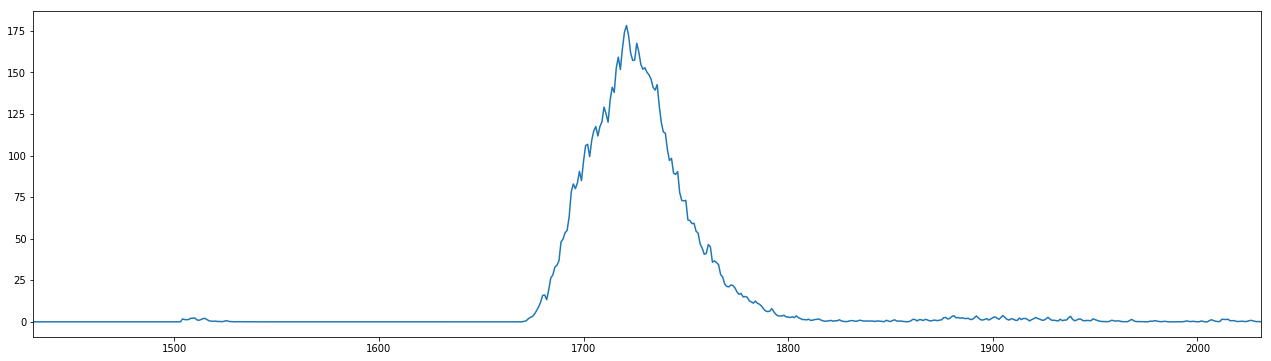

In [19]:
plt.figure(figsize=(22, 6))
plt.plot(wf)
plt.xlim(ct - 300, ct + 300)
plt.show()

## Speed

In [20]:
# The generation and reconstruction can be sped up by disabling more of pax' plugins,
# mainly pax' own position reconstruction. Of course that would require that we store
# the patterns somewhere and process them later with pax to get the pax reconstructed
# positions but then at least the ABC method will run faster.
# The speed also depends on the number of s1_photons and s2_electrons used.

# s1_photons = 500, s2_electrons = 25 -> 3.30it/s, XENON1T_ABC.ini
# s1_photons = 500, s2_electrons = 25 -> 3.73it/s, XENON1T_ABC_minimal.ini
# s1_photons = 50,  s2_electrons = 25 -> 4.04it/s, XENON1T_ABC_minimal.ini


from tqdm import tqdm
from pax.plugins.io.WaveformSimulator import uniform_circle_rv

model.change_defaults(s1_photons = 50, s2_electrons = 25)

patterns = [model(*uniform_circle_rv(tpc_r)) for _ in tqdm(range(100))]

100%|██████████| 100/100 [00:32<00:00,  3.08it/s]


# Python 3.5 and ELFI

In [20]:
import sys
sys.version

'3.5.5 |Anaconda, Inc.| (default, Mar 12 2018, 23:12:44) \n[GCC 7.2.0]'

In [21]:
import elfi